# **FogML Time Series Data Classification For MCU**

## FogML installation

In [ ]:
!pip install fogml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from fogml.generators import GeneratorFactory

from sklearn.mixture import GaussianMixture

## Data preparation

In the example application for MCU, set `#define DATA_LOGGER` and collect data for various gestures/speeds/etc.

In [ ]:
DATA = ["speed0.csv", "speed1.csv", "speed2.csv", "speed3.csv"]
LABELS = ["OFF", "SPEED 1", "SPEED 2", "SPEED 3"]

## Random forrest model training

In [ ]:
spX_t = []
spY_t = []

i = 0
for fname in DATA:
  tmp = pd.read_csv(fname, delimiter=" ", header=None)
  spX_t.append(tmp)
  spY_t.append([i] * tmp.shape[0])

spX = np.concatenate( spX_t, axis = 0 )
spY = np.concatenate( spY_t, axis = 0 )

print(spX.shape)
print(spY.shape)

(124, 12)
(124,)


In [ ]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(spX, spY)
print( 'accuracy: ',clf.score(spX,spY))

accuracy:  1.0


# FogML Classifier Generation

In [ ]:
factory = GeneratorFactory()
generator = factory.get_generator(clf)
generator.generate()

Copy generated `random_forrest_model.c` to the folder `fogml_generated` in the MCU project.


Anomaly Detection

## Appendix - Feature Importance Analysis

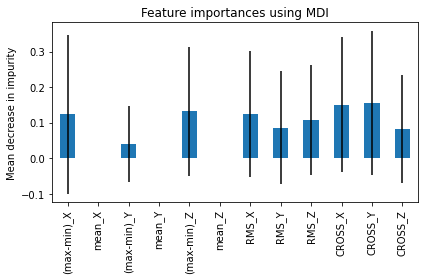

In [ ]:
DSP_BLOCKS = ["BASE", "RMS", "CROSSINGS"]

DSP_BLOCKS_FEATURES = {"BASE": ["(max-min)_X", "mean_X", "(max-min)_Y", "mean_Y", "(max-min)_Z", "mean_Z"],
              "RMS": ["RMS_X", "RMS_Y", "RMS_Z"],
              "CROSSINGS": ["CROSS_X", "CROSS_Y", "CROSS_Z"]}

feature_names = ["(max-min)_X", "mean_X", "(max-min)_Y", "mean_Y", "(max-min)_Z", "mean_Z",
                 "RMS_X", "RMS_Y", "RMS_Z",
                 "CROSS_X", "CROSS_Y", "CROSS_Z"]


importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()